# Project 02: Movielens Case Study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Import rating Dataset
rating = ['UserID','MovieID','Rating','Timestamp']
rating_df = pd.read_csv('ratings.dat',header=None,delimiter='::',names=rating, engine = 'python')

In [15]:
# Import movies Dataset
movies = ['MovieID','MovieName','Genres']
movies_df= pd.read_csv('movies.dat',header=None,delimiter ='::',names=movies,encoding='Ansi',engine ='python')

In [16]:
# Import userid Dataset
userid = ["UserID","Gender","Age","Occupation","Zip-code"]
userid_df = pd.read_csv('users.dat',header=None, delimiter='::',names=userid, engine = 'python')

In [17]:
rating_df.shape

(1000209, 4)

In [18]:
rating_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [19]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [21]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MovieID    3883 non-null   int64 
 1   MovieName  3883 non-null   object
 2   Genres     3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [22]:
movies_df.head()

,MovieID,MovieName,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [23]:
movies_df.shape

(3883, 3)

In [24]:
userid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [25]:
userid_df.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [26]:
userid_df.shape

(6040, 5)

In [27]:
#Merging the three datasets
merged_data = rating_df.merge(movies_df, on='MovieID', how='inner')

In [28]:
master_data = merged_data.merge(userid_df, on='UserID', how='inner')

In [29]:
master_data.head()

,UserID,MovieID,Rating,Timestamp,MovieName,Genres,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [30]:
master_data = master_data[['MovieID', 'MovieName', 'UserID', 'Age', 'Gender', 'Occupation', 'Rating']]

In [32]:
master_data.head()

,MovieID,MovieName,UserID,Age,Gender,Occupation,Rating
0,1193,One Flew Over the Cuckoo's Nest (1975),1,1,F,10,5
1,661,James and the Giant Peach (1996),1,1,F,10,3
2,914,My Fair Lady (1964),1,1,F,10,3
3,3408,Erin Brockovich (2000),1,1,F,10,4
4,2355,"Bug's Life, A (1998)",1,1,F,10,5


<Axes: >

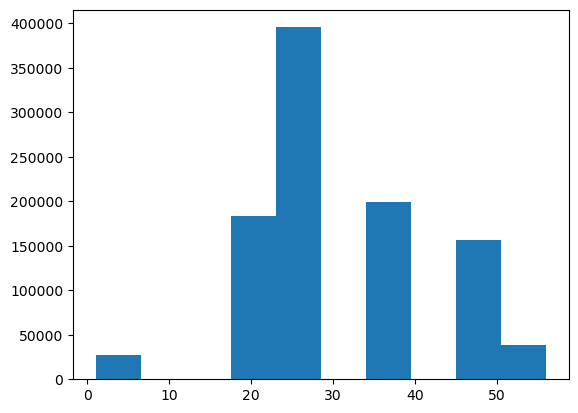

In [34]:
#Visualizing User Age Distribution
master_data.Age.hist(grid = False)

In [49]:
#Visualising User rating of the movie “Toy Story”
toystoryRating = master_data[master_data['MovieName'].str.contains('Toy Story') == True]

In [51]:
toystoryRating.groupby(["MovieName","Rating"]).size()

MovieName           Rating
Toy Story (1995)    1          16
                    2          61
                    3         345
                    4         835
                    5         820
Toy Story 2 (1999)  1          25
                    2          44
                    3         214
                    4         578
                    5         724
dtype: int64

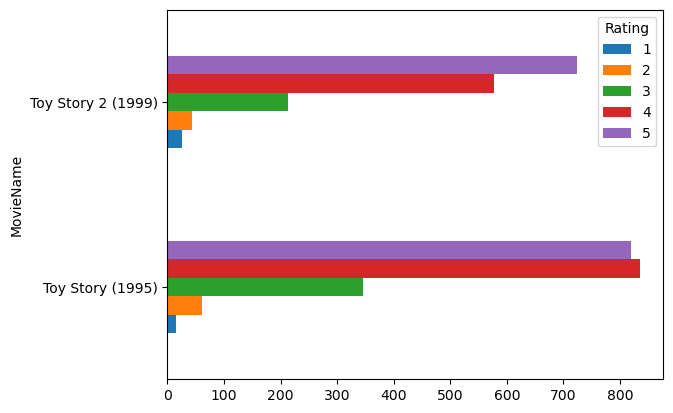

In [57]:
toystoryRating.groupby(["MovieName","Rating"]).size().unstack().plot(kind='barh',stacked=False,legend=True)
plt.show()

In [58]:
#Top 25 movies by viewership rating
top_25_movies = master_data.groupby('MovieName')['Rating'].mean().nlargest(25)

In [59]:
top_25_movies.head()

MovieName
Baby, The (1973)                      5.0
Bittersweet Motel (2000)              5.0
Follow the Bitch (1998)               5.0
Gate of Heavenly Peace, The (1995)    5.0
Lured (1947)                          5.0
Name: Rating, dtype: float64

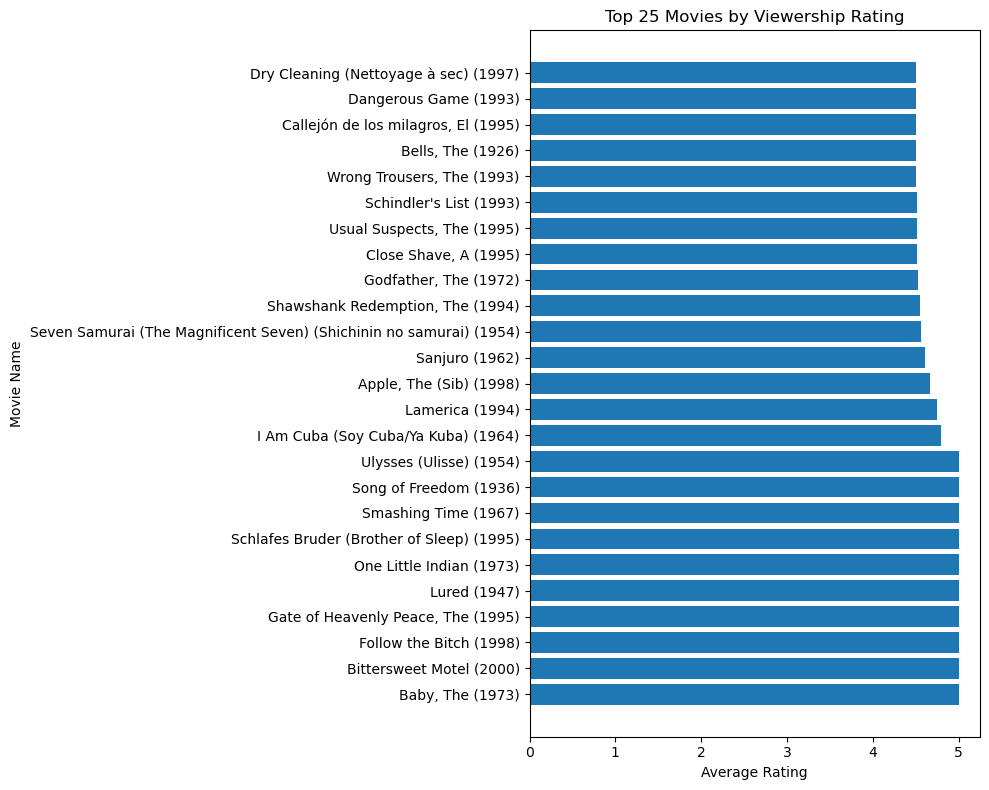

In [60]:
plt.figure(figsize=(10, 8))
plt.barh(top_25_movies.index, top_25_movies.values)
plt.xlabel('Average Rating')
plt.ylabel('Movie Name')
plt.title('Top 25 Movies by Viewership Rating')
plt.tight_layout()
plt.show()

In [62]:
#Find the ratings for all the movies reviewed by for a particular user of user id = 2696
rating_for_user = master_data[master_data['UserID']==2696]['Rating']

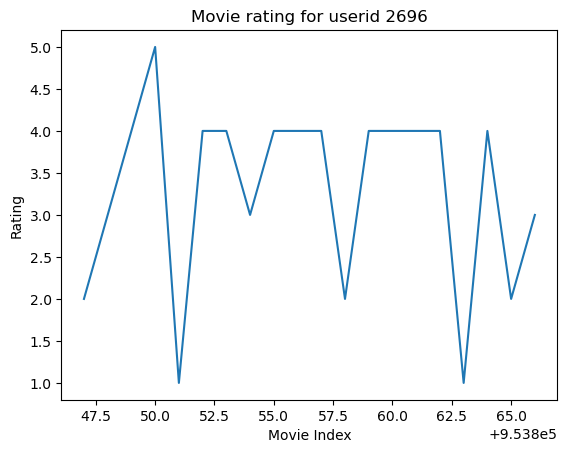

In [67]:
plt.plot(rating_for_user)
plt.xlabel('Movie Index')
plt.ylabel('Rating')
plt.title('Movie rating for userid 2696')
plt.show()

In [70]:
# Find out all the unique genres
merged_data = rating_df.merge(movies_df, on='MovieID', how='inner')
master_data = merged_data.merge(userid_df, on='UserID', how='inner')
master_data.head()
genre_list = master_data['Genres'].str.split('|')

In [71]:
print(genre_list)

0                                   [Drama]
1          [Animation, Children's, Musical]
2                        [Musical, Romance]
3                                   [Drama]
4           [Animation, Children's, Comedy]
                         ...               
1000204                             [Drama]
1000205                           [Western]
1000206                            [Horror]
1000207                       [Action, War]
1000208         [Adventure, Drama, Romance]
Name: Genres, Length: 1000209, dtype: object


In [72]:
all_genres = [genre for genres in genre_list for genre in genres]

In [73]:
print(all_genres)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [74]:
unique_genres = set(all_genres)

In [75]:
print(unique_genres)

{'Comedy', 'Film-Noir', 'Fantasy', 'Crime', 'Horror', 'Drama', 'Documentary', 'Mystery', "Children's", 'Sci-Fi', 'Thriller', 'Adventure', 'Western', 'Action', 'Romance', 'Musical', 'Animation', 'War'}


In [76]:
#Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
one_hot_encoding = pd.get_dummies(genre_list.apply(pd.Series).stack()).sum(level=0)


C:\Users\Admin\AppData\Local\Temp\ipykernel_1976\581151753.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  one_hot_encoding = pd.get_dummies(genre_list.apply(pd.Series).stack()).sum(level=0)


In [77]:
print(one_hot_encoding)

         Action  Adventure  Animation  Children's  Comedy  Crime  Documentary  \
0             0          0          0           0       0      0            0   
1             0          0          1           1       0      0            0   
2             0          0          0           0       0      0            0   
3             0          0          0           0       0      0            0   
4             0          0          1           1       1      0            0   
...         ...        ...        ...         ...     ...    ...          ...   
1000204       0          0          0           0       0      0            0   
1000205       0          0          0           0       0      0            0   
1000206       0          0          0           0       0      0            0   
1000207       1          0          0           0       0      0            0   
1000208       0          1          0           0       0      0            0   

         Drama  Fantasy  Fi

In [78]:
encoded_data = pd.concat([master_data, one_hot_encoding], axis=1)

In [79]:
encoded_data.head()

,UserID,MovieID,Rating,Timestamp,MovieName,Genres,Gender,Age,Occupation,Zip-code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067,...,0,0,0,1,0,0,0,0,0,0
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Determine the features affecting the ratings of any particular movie.
